In [1]:
import numpy as np

from tslearn.clustering import TimeSeriesKMeans

import matplotlib.pyplot as plt

/home/piotr/miniconda3/envs/mlenv/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
dataset = np.load('../perfumes-dataset.npz', allow_pickle=True)['data'].tolist()

In [3]:
signals = [d['data'] for d in dataset]

In [4]:
signals_array = np.array(signals)

print('Signals shape:', signals_array)

Signals shape: [[[[[7.54371200e+07 8.02154240e+07 8.43992240e+07 ... 1.02400000e+08
     1.02400000e+08 1.02400000e+08]
    [8.39344300e+06 8.47813700e+06 8.57127900e+06 ... 1.04489800e+07
     1.04489800e+07 1.04489800e+07]
    [6.19854750e+05 6.19854750e+05 6.23819688e+05 ... 7.05720188e+05
     7.05720188e+05 7.05720188e+05]
    ...
    [3.80881531e+05 3.90243906e+05 4.00078125e+05 ... 4.33622688e+05
     4.33622688e+05 4.33622688e+05]
    [4.23665688e+05 4.38919844e+05 4.46673938e+05 ... 4.98539438e+05
     4.98539438e+05 4.98539438e+05]
    [4.41760125e+05 4.57449188e+05 4.65243062e+05 ... 5.15869031e+05
     5.15869031e+05 5.15869031e+05]]

   [[3.52654950e+01 3.56048240e+01 3.58511510e+01 ... 3.92847210e+01
     3.92847210e+01 3.92847210e+01]
    [3.43907930e+01 3.47074970e+01 3.49688990e+01 ... 3.83521650e+01
     3.83521650e+01 3.83521650e+01]
    [3.46521990e+01 3.49663890e+01 3.52428740e+01 ... 3.86236340e+01
     3.86236340e+01 3.86236340e+01]
    ...
    [3.60296130e+01 3.

# Get resistancy signals

In [5]:
resistances = signals_array[:, :, 0, :]

In [6]:
resistances[resistances<7000] # all g

array([], dtype=float64)

In [7]:
resistances

array([[[[7.54371200e+07, 8.02154240e+07, 8.43992240e+07, ...,
          1.02400000e+08, 1.02400000e+08, 1.02400000e+08],
         [8.39344300e+06, 8.47813700e+06, 8.57127900e+06, ...,
          1.04489800e+07, 1.04489800e+07, 1.04489800e+07],
         [6.19854750e+05, 6.19854750e+05, 6.23819688e+05, ...,
          7.05720188e+05, 7.05720188e+05, 7.05720188e+05],
         ...,
         [3.80881531e+05, 3.90243906e+05, 4.00078125e+05, ...,
          4.33622688e+05, 4.33622688e+05, 4.33622688e+05],
         [4.23665688e+05, 4.38919844e+05, 4.46673938e+05, ...,
          4.98539438e+05, 4.98539438e+05, 4.98539438e+05],
         [4.41760125e+05, 4.57449188e+05, 4.65243062e+05, ...,
          5.15869031e+05, 5.15869031e+05, 5.15869031e+05]],

        [[8.16393680e+07, 8.42365040e+07, 8.90434800e+07, ...,
          1.02400000e+08, 1.02400000e+08, 1.02400000e+08],
         [6.17332350e+06, 6.13862850e+06, 6.15592700e+06, ...,
          8.36131650e+06, 8.36131650e+06, 8.36131650e+06],
        

# Normalize resistances signal

In [8]:
perftype_splitted = []
for perf in resistances:
    sensor_splitted = []
    for sensor in perf:
        cycle_normalized = []
        for cycle in sensor:
            # print(cycle.shape)
            mean_val = cycle.mean()
            std_val = cycle.std()
            normalized_val = (cycle - mean_val)/std_val

            cycle_normalized.append(normalized_val)
        
        sensor_splitted.append(cycle_normalized)
    perftype_splitted.append(sensor_splitted)


resistances_normalized = np.array(perftype_splitted)

In [9]:
resistances_normalized

array([[[[-4.58197661e+00, -3.68453666e+00, -2.89875383e+00, ...,
           4.82072391e-01,  4.82072391e-01,  4.82072391e-01],
         [-2.30950236e+00, -2.19064254e+00, -2.05992677e+00, ...,
           5.75244599e-01,  5.75244599e-01,  5.75244599e-01],
         [-2.19268613e+00, -2.19268613e+00, -2.06485390e+00, ...,
           5.75672953e-01,  5.75672953e-01,  5.75672953e-01],
         ...,
         [-5.25305219e+00, -4.24484978e+00, -3.18583611e+00, ...,
           4.26464059e-01,  4.26464059e-01,  4.26464059e-01],
         [-4.70955110e+00, -3.64800042e+00, -3.10838595e+00, ...,
           5.00981610e-01,  5.00981610e-01,  5.00981610e-01],
         [-5.03553838e+00, -3.88088116e+00, -3.30728067e+00, ...,
           4.18604169e-01,  4.18604169e-01,  4.18604169e-01]],

        [[-6.73563312e+00, -5.87146508e+00, -4.27199742e+00, ...,
           1.72235670e-01,  1.72235670e-01,  1.72235670e-01],
         [-3.01509920e+00, -3.07143469e+00, -3.04334651e+00, ...,
           5.37621902e

# Drop sensor axis as values are normalized 

In [10]:
resistances_normalized.shape

(18, 8, 10, 101)

In [11]:
#in loop to ensure everything is ok..
resistances = []
for perf in resistances_normalized:
    reshaped_resistancy = perf.reshape((80, 101))
    resistances.append(reshaped_resistancy)

resistances = np.array(resistances)

In [12]:
resistances.shape

(18, 80, 101)

# Prepare dataset and labels for clustering

In [17]:
labels = [d['name'] for d in dataset]
X = []
y = []
for res, lab in zip(resistances, labels):
    X.append(res)
    y.append([lab]*80)

X = np.array(X).reshape((18*80, 101))
y = np.array(y).reshape((18*80))


/tmp/ipykernel_22717/1818109736.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1439 + 1) instead
  random_idxes = np.random.random_integers(0, len(X) - 1, 16)


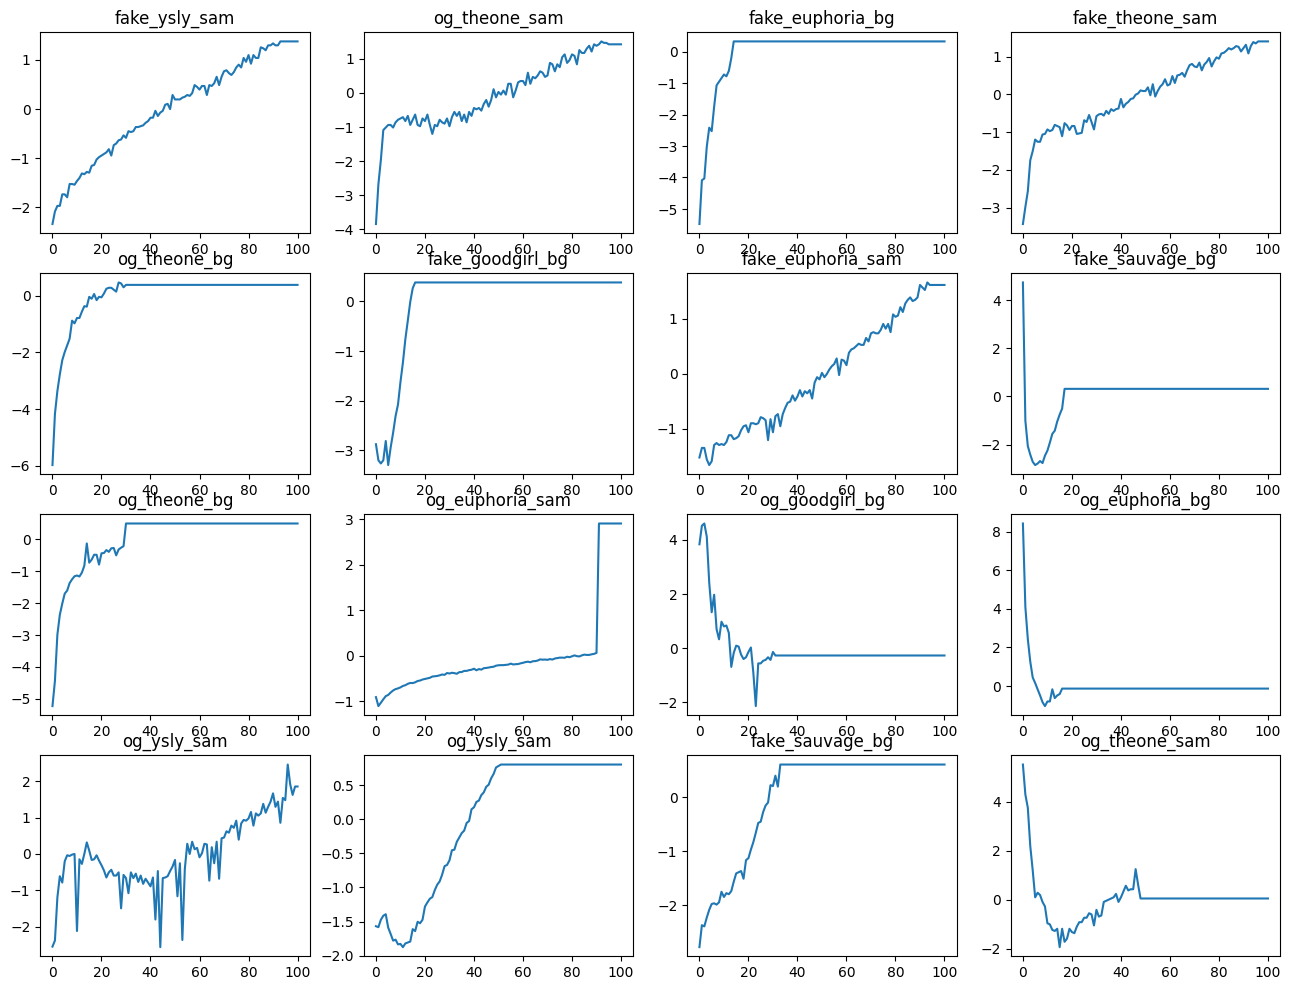

In [18]:
random_idxes = np.random.random_integers(0, len(X) - 1, 16)
fig, axes = plt.subplots(4, 4, figsize = (16,12))
axes = axes.flatten()

for i in range(16):
    axes[i].plot(X[random_idxes[i]])
    axes[i].set_title(y[random_idxes[i]])

In [19]:
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMinMax, TimeSeriesScalerMeanVariance

X = to_time_series_dataset(X)

In [20]:
from tslearn.clustering import TimeSeriesKMeans, KernelKMeans

kts = TimeSeriesKMeans(n_clusters= 16, n_jobs=-1, max_iter = 1000, verbose = True, random_state=42)

# kts = KernelKMeans(n_clusters= 16, n_jobs = -1)

kts = kts.fit(X)

12.721 --> 9.609 --> 9.340 --> 9.205 --> 9.124 --> 9.073 --> 9.049 --> 9.035 --> 9.023 --> 9.010 --> 9.002 --> 9.000 --> 8.999 --> 8.999 --> 


In [24]:
np.unique(y)

array(['fake_euphoria_bg', 'fake_euphoria_sam', 'fake_goodgirl_bg',
       'fake_goodgirl_sam', 'fake_sauvage_bg', 'fake_sauvage_sam',
       'fake_theone_bg', 'fake_theone_sam', 'fake_ysly_bg',
       'fake_ysly_sam', 'og_euphoria_bg', 'og_euphoria_sam',
       'og_goodgirl_bg', 'og_goodgirl_sam', 'og_theone_bg',
       'og_theone_sam', 'og_ysly_bg', 'og_ysly_sam'], dtype='<U17')

In [29]:
color_dict = {
    'og_goodgirl_sam': 'blue',
    'fake_euphoria_sam': 'orange',
    'og_theone_bg': 'green',
    'og_theone_sam': 'red',
    'fake_theone_sam': 'purple',
    'fake_euphoria_bg': 'yellow',
    'fake_sauvage_bg': 'cyan',
    'og_ysly_bg': 'magenta',
    'fake_sauvage_sam': 'lime',
    'fake_goodgirl_bg': 'pink',
    'og_goodgirl_bg': 'teal',
    'fake_goodgirl_sam': 'brown',
    'og_euphoria_bg': 'olive',
    'og_euphoria_sam': 'navy',
    'fake_theone_bg': 'maroon',
    'og_ysly_sam': 'gold',
    'fake_ysly_bg': 'gray',
    'fake_ysly_sam': 'silver'
    
}

Text(0.5, 0.98, 'Clustering with TSeriesKmeans \n k = 16')

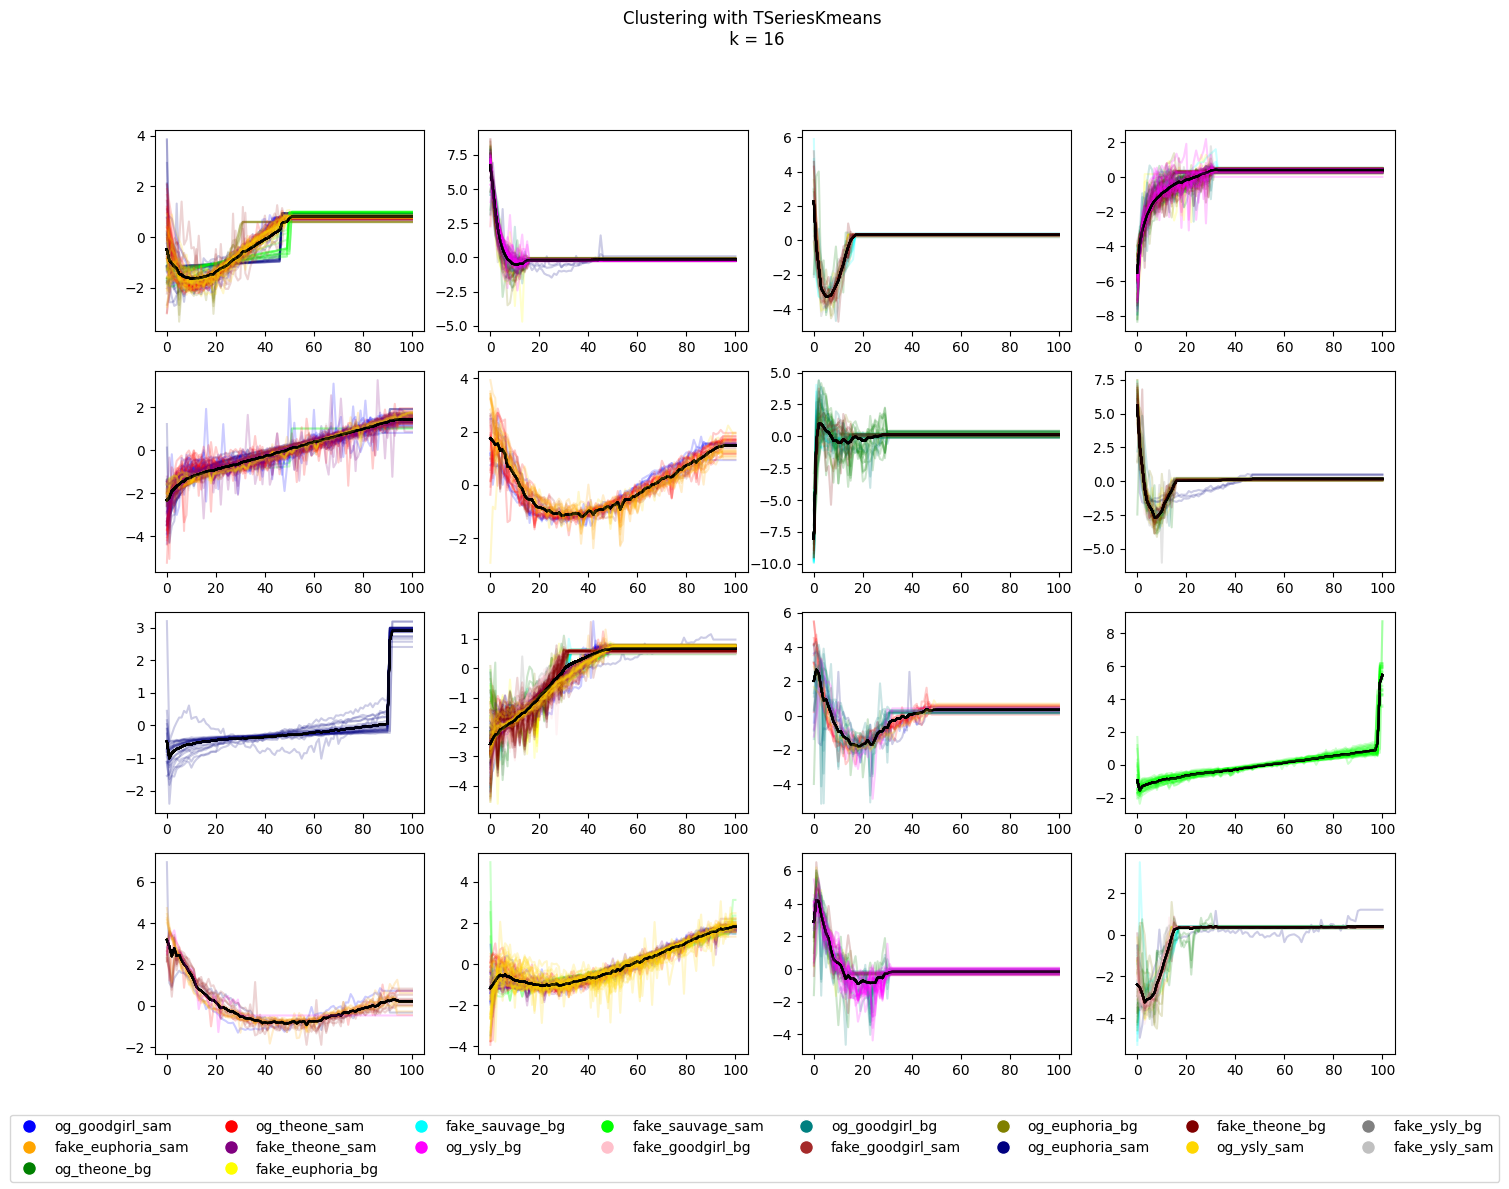

In [30]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

for x, lab in zip(X, y):
    y_pred = kts.predict(x.reshape((1, 101, 1)))
    assigned_centroid = kts.cluster_centers_[y_pred]
    
    axes[y_pred[0]].plot(assigned_centroid.squeeze(), color = 'black')
    
    color = color_dict[lab]
    axes[y_pred[0]].plot(x, color = color, alpha = 0.2)

handles = []
labels = []

for label, color in color_dict.items():
    handles.append(plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = color, markersize = 10))
    labels.append(label)

fig.legend(handles, labels, loc='lower center', ncols = 8)
fig.suptitle('Clustering with TSeriesKmeans \n k = 16')


    

# Draw results without bg-sample partition

In [ ]:
np.unique(y)

In [34]:
mapping = {'fake_euphoria_bg': 'fake_euphoria',
           'fake_euphoria_sam': 'fake_euphoria',
           'og_euphoria_bg': 'og_euphoria',
           'og_euphoria_sam': 'og_euphoria',
           'fake_goodgirl_bg': 'fake_goodgirl',
           'fake_goodgirl_sam': 'fake_goodgirl',
           'fake_sauvage_bg': 'fake_sauvage',
           'fake_sauvage_sam': 'fake_sauvage',
           'fake_theone_bg': 'fake_theone',
           'fake_theone_sam': 'fake_theone',
           'fake_ysly_bg': 'fake_ysly',
           'fake_ysly_sam': 'fake_ysly',
           'og_goodgirl_bg': 'og_goodgirl',
           'og_goodgirl_sam': 'og_goodgirl',
           'og_theone_bg': 'og_theone',
           'og_theone_sam': 'og_theone',
           'og_ysly_bg': 'og_ysly',
           'og_ysly_sam': 'og_ysly'}



new_color_dict = {
    'fake_euphoria': 'red',
    'og_euphoria': 'green',
    'fake_goodgirl': 'magenta',
    'og_goodgirl': 'cyan',
    'fake_sauvage': 'purple',
    'og_theone': 'lime',
    'fake_theone':'pink',
    'og_ysly': 'blue',
    'fake_ysly': 'silver'

}

y_ = np.array([mapping[label] for label in y])

In [35]:
np.unique(y_).shape

(9,)

In [38]:
kts = TimeSeriesKMeans(n_clusters= 36, metric='euclidean', n_jobs=-1, max_iter = 1000, verbose = True, random_state=42)
kts = kts.fit(X)

7.992 --> 5.962 --> 

5.727 --> 5.645 --> 5.630 --> 5.617 --> 5.613 --> 5.611 --> 5.610 --> 5.610 --> 


Text(0.5, 0.98, 'Clustering with TSeriesKmeans \n k = 16')

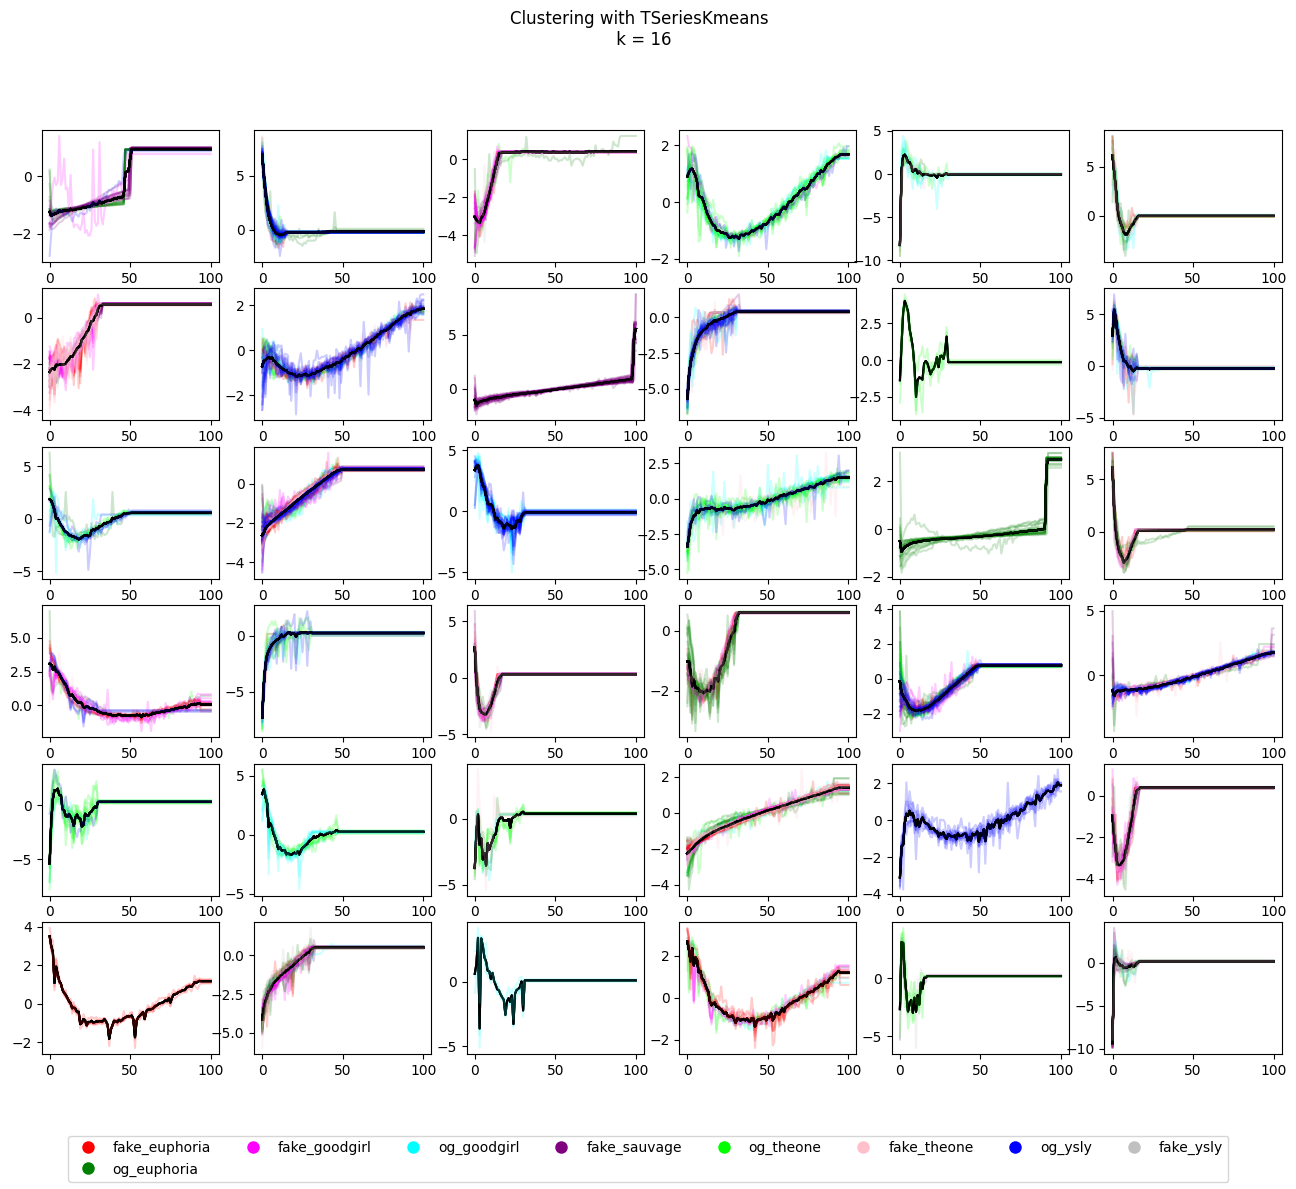

In [39]:
fig, axes = plt.subplots(6, 6, figsize=(16, 12))
axes = axes.flatten()

for x, lab in zip(X, y_):
    y_pred = kts.predict(x.reshape((1, 101, 1)))
    assigned_centroid = kts.cluster_centers_[y_pred]
    
    axes[y_pred[0]].plot(assigned_centroid.squeeze(), color = 'black')
    
    color = new_color_dict[lab]
    axes[y_pred[0]].plot(x, color = color, alpha = 0.2)

handles = []
labels = []

for label, color in new_color_dict.items():
    handles.append(plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = color, markersize = 10))
    labels.append(label)

fig.legend(handles, labels, loc='lower center', ncols = 8)
fig.suptitle('Clustering with TSeriesKmeans \n k = 16')


    

# Optimize rand score by selecting optimal number of clusers

## With sample-background partition

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import adjusted_rand_score

# y_codes = LabelEncoder().fit_transform(y)

# # rand_scores = []
# # for k in range(5, 30):
# #     kts_mod = TimeSeriesKMeans(n_clusters=k)
# #     y_pred = kts_mod.fit_predict(X)
    
# #     rand_score = adjusted_rand_score(labels_true=y_codes, labels_pred=y_pred)

# #     rand_scores.append({'k': k,
# #                         'rand_score': rand_score})



In [ ]:
# rand_scores

# 3D visualization

In [ ]:
resistances.shape

In [ ]:
resistances = resistances.reshape((16*8*10, 101))

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(X.squeeze(),X.squeeze())

In [ ]:
dist

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=3)

tsne_projection = tsne.fit_transform(dist)



In [ ]:
colors = [new_color_dict[_] for _ in y_]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=tsne_projection[:, 0],
    y=tsne_projection[:, 1],
    z=tsne_projection[:, 2],
    text = y,
    mode='markers',
    marker=dict(
        size=8,
        color=colors,                # Set color to an array/list of desired values
        opacity=0.8,
    )
)])

# Update layout for better visualization
fig.update_layout(
    title="t-SNE Projection",
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3'
    )
)

# Show the plot
fig.show()

In [ ]:
from umap import UMAP
umap = UMAP(n_components = 3,metric='euclidean', n_neighbors=10000)


umap_projection = umap.fit_transform(dist)


In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=umap_projection[:, 0],
    y=umap_projection[:, 1],
    z=umap_projection[:, 2],
    mode='markers',
    text = y_,
    marker=dict(
        size=8,
        color=colors,  # Set color to the list of colors based on labels
        opacity=0.8
    )
)])

# Update layout for better visualization
fig.update_layout(
    title="UMAP Projection",
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3'
    )
)

# Show the plot
fig.show()

In [ ]:
y